##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number:***

---
(*In Title case, separated with commas*)
***Full names of all students in the team:***

---
(*Separated by commas*)
***Id number of all students in the team:***


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [112]:
!pip install --upgrade ipython #run this line if you are getting a version issue
%pip install sdv
%pip install urllib3 == 1.26.7


ERROR: Invalid requirement: '=='


In [113]:
from sdv.datasets.local import load_csvs
datasets = load_csvs(folder_name="/content/") #change folder location


In [114]:
diabetes_table = datasets['diabetes2_csv']


In [115]:
from sdv.metadata import SingleTableMetadata


In [116]:
metadata = SingleTableMetadata()


In [117]:
metadata.detect_from_csv(filepath="/content/diabetes2_csv.csv")    #change file path


In [118]:
print(type(metadata))

<class 'sdv.metadata.single_table.SingleTableMetadata'>


In [119]:
diabetes_table.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)


In [121]:
# !pip install --upgrade ipython

In [122]:
synthesizer.fit(
    data=diabetes_table
)


In [123]:
synthetic_data = synthesizer.sample(
    num_rows=500
)


In [124]:
synthetic_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19,10,38.387409,0.561331,40,1
1,0,151,44,6,105,26.125923,0.463959,27,1
2,3,169,57,24,240,33.224573,0.541364,36,0
3,4,86,61,35,0,32.918264,0.526311,39,0
4,6,75,62,31,77,37.453830,0.178734,21,0


In [125]:
synthetic_data.shape


(500, 9)

In [126]:
sensitive_column_names = ['Pregnancies', 'Glucose', 'BloodPressure',
                          'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


In [127]:
diabetes_table[sensitive_column_names].head(3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672


In [128]:
synthesizer.save('my_synthesizer.pkl')

synthesizer = SingleTablePreset.load('my_synthesizer.pkl')


In [129]:
synthetic_data.to_csv("/content/generated_00.csv", index=False)

# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

We have considered the following in Preprocessing:

1.   We see that the dataset doesnt have None values, they were actually written as zero.
2.   Of the following features only pregnancies could take 0 as feasible value and even target could have 0 or 1 as outcome, hence we have replaced all 0s of other columns with None then replaced them with average values of the columns.
3.   We also removed any duplicate data present




In [130]:
import numpy as np

In [131]:
dt1 = synthetic_data.drop(columns=['Outcome', 'Pregnancies'], axis=1)


In [132]:
# diabetes_table.iloc[:,1:7].replace(0, np.nan, inplace=True)
dt1.replace(0, np.nan, inplace=True)


In [133]:
dt1.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,149,96,19.0,10.0,38.387409,0.561331,40
1,151,44,6.0,105.0,26.125923,0.463959,27
2,169,57,24.0,240.0,33.224573,0.541364,36
3,86,61,35.0,NaN,32.918264,0.526311,39
4,75,62,31.0,77.0,37.453830,0.178734,21


In [134]:
dt1["Outcome"] = synthetic_data["Outcome"]
dt1["Pregnancies"] = synthetic_data["Pregnancies"]


In [135]:
last_column_name = dt1.columns[-1]

# Extract the last column
last_column = dt1.pop(last_column_name)

# Insert the last column as the first column
dt1.insert(0, last_column_name, last_column)

In [136]:
dt1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19.0,10.0,38.387409,0.561331,40,1
1,0,151,44,6.0,105.0,26.125923,0.463959,27,1
2,3,169,57,24.0,240.0,33.224573,0.541364,36,0
3,4,86,61,35.0,NaN,32.918264,0.526311,39,0
4,6,75,62,31.0,77.0,37.453830,0.178734,21,0


In [137]:
synthetic_data = dt1


In [138]:
synthetic_data['Insulin'].value_counts(dropna=False)


NaN      124
106.0      5
35.0       5
68.0       4
63.0       4
        ... 
378.0      1
206.0      1
125.0      1
22.0       1
297.0      1
Name: Insulin, Length: 216, dtype: int64

In [139]:
synthetic_data['Pregnancies'].fillna(
    diabetes_table['Pregnancies'].mean(), inplace=True)


In [140]:
synthetic_data.drop_duplicates(inplace=True)


In [141]:
synthetic_data['Glucose'].fillna(
    synthetic_data['Glucose'].mean(), inplace=True)


In [142]:
synthetic_data['BloodPressure'].fillna(
    synthetic_data['BloodPressure'].mean(), inplace=True)


In [143]:
synthetic_data['SkinThickness'].fillna(
    synthetic_data['SkinThickness'].mean(), inplace=True)


In [144]:
synthetic_data['Insulin'].fillna(
    synthetic_data['Insulin'].mean(), inplace=True)


In [145]:
synthetic_data['BMI'].fillna(synthetic_data['BMI'].mean(), inplace=True)


In [146]:
synthetic_data['DiabetesPedigreeFunction'].fillna(
    synthetic_data['DiabetesPedigreeFunction'].mean(), inplace=True)


In [147]:
synthetic_data['Age'].fillna(synthetic_data['Age'].mean(), inplace=True)


In [148]:
synthetic_data['Outcome'].fillna(
    synthetic_data['Outcome'].mean(), inplace=True)


In [149]:
synthetic_data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19.0,10.000,38.387409,0.561331,40,1
1,0,151,44,6.0,105.000,26.125923,0.463959,27,1
2,3,169,57,24.0,240.000,33.224573,0.541364,36,0
3,4,86,61,35.0,129.375,32.918264,0.526311,39,0
4,6,75,62,31.0,77.000,37.453830,0.178734,21,0
...,...,...,...,...,...,...,...,...,...
495,0,101,87,46.0,297.000,38.732291,0.421418,21,0
496,4,124,72,28.0,27.000,33.576185,0.630074,50,0
497,4,181,35,38.0,249.000,35.137482,0.434926,35,1
498,4,152,81,49.0,165.000,36.694959,0.820895,45,1


Here we are further plotting graphs and checking how our data is doing, in the process we also checked for anyo outliers still present as synthetic data generation automatically removes them.

In [150]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

In [151]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion

In [152]:
synthetic_data.to_csv("/content/generated_05.csv", index=False) #changed file name


In [153]:
diabetes_df = pd.read_csv("/content/generated_05.csv")
diabetes_df.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

,0,1,2,3,4
Pregnancies,7.000000,0.000000,3.000000,4.000000,6.000000
Glucose,149.000000,151.000000,169.000000,86.000000,75.000000
BloodPressure,96.000000,44.000000,57.000000,61.000000,62.000000
SkinThickness,19.000000,6.000000,24.000000,35.000000,31.000000
Insulin,10.000000,105.000000,240.000000,129.375000,77.000000
BMI,38.387409,26.125923,33.224573,32.918264,37.453830
DiabetesPedigreeFunction,0.561331,0.463959,0.541364,0.526311,0.178734
Age,40.000000,27.000000,36.000000,39.000000,21.000000
Outcome,1.000000,1.000000,0.000000,0.000000,0.000000


Here we are checking the target imbalance

In [154]:
colors = ['yellow', 'red']
labels = ['0','1']
values = diabetes_df['Outcome'].value_counts()/diabetes_df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

Details of various columns

In [155]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

diabetes_df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.006000,120.454000,71.080000,23.931868,129.375000,32.518053,0.511352,34.450000,0.330000
std,3.052967,33.702754,18.964517,12.110620,73.304675,7.887027,0.299594,10.082600,0.470684
min,0.000000,14.000000,22.000000,1.000000,1.000000,10.903340,0.078000,21.000000,0.000000
25%,2.000000,98.000000,58.000000,15.000000,77.000000,27.161187,0.255483,27.000000,0.000000
50%,4.000000,120.500000,71.000000,23.931868,129.375000,32.593184,0.508918,33.000000,0.000000
75%,6.000000,145.000000,85.000000,32.000000,165.000000,37.500736,0.735819,41.000000,1.000000
max,17.000000,199.000000,122.000000,55.000000,378.000000,59.937412,1.413874,73.000000,1.000000


Here, we are checking if we still are left with any outliers even after synthetic data removes them

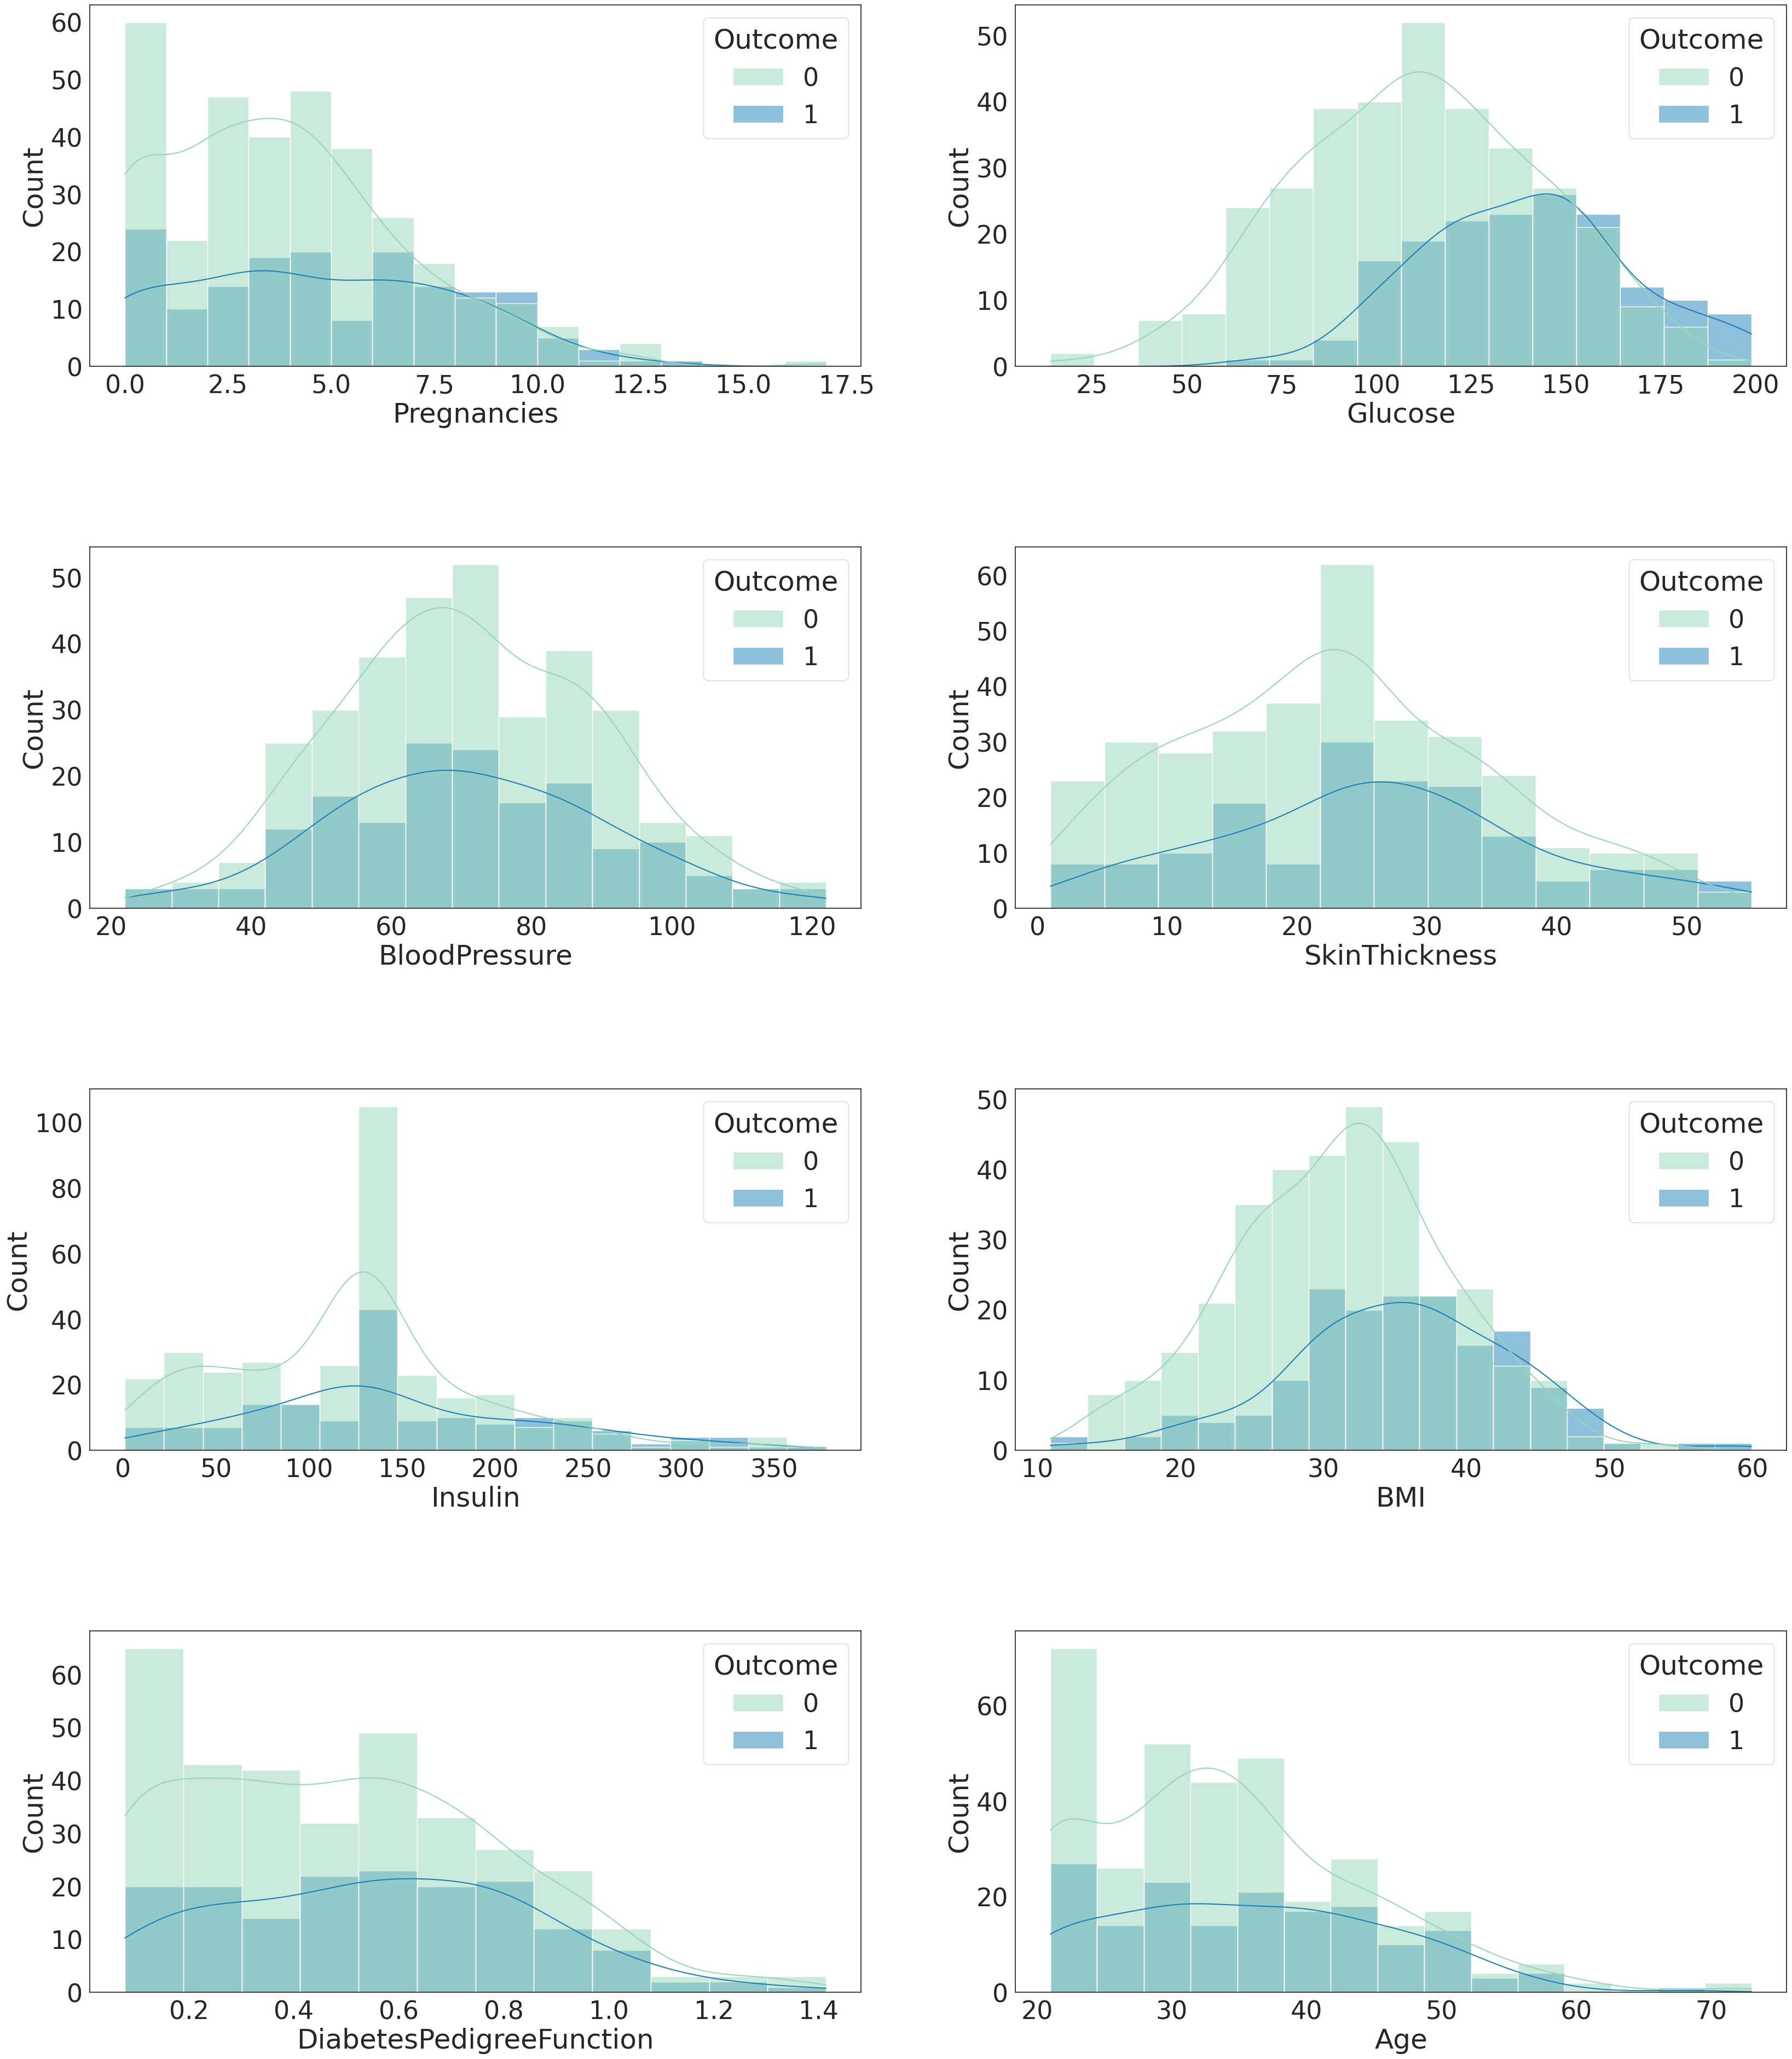

In [156]:
feature_names = [cname for cname in diabetes_df.loc[:,:'Age'].columns]
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

In [157]:
zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Pregnancies 0 number of cases 84, percent is 16.80 %
Glucose 0 number of cases 0, percent is 0.00 %
BloodPressure 0 number of cases 0, percent is 0.00 %
SkinThickness 0 number of cases 0, percent is 0.00 %
Insulin 0 number of cases 0, percent is 0.00 %
BMI 0 number of cases 0, percent is 0.00 %


This the correlation matrix which gives the correlation between all the features

Text(0.5, 1.0, 'Correlation Plot')

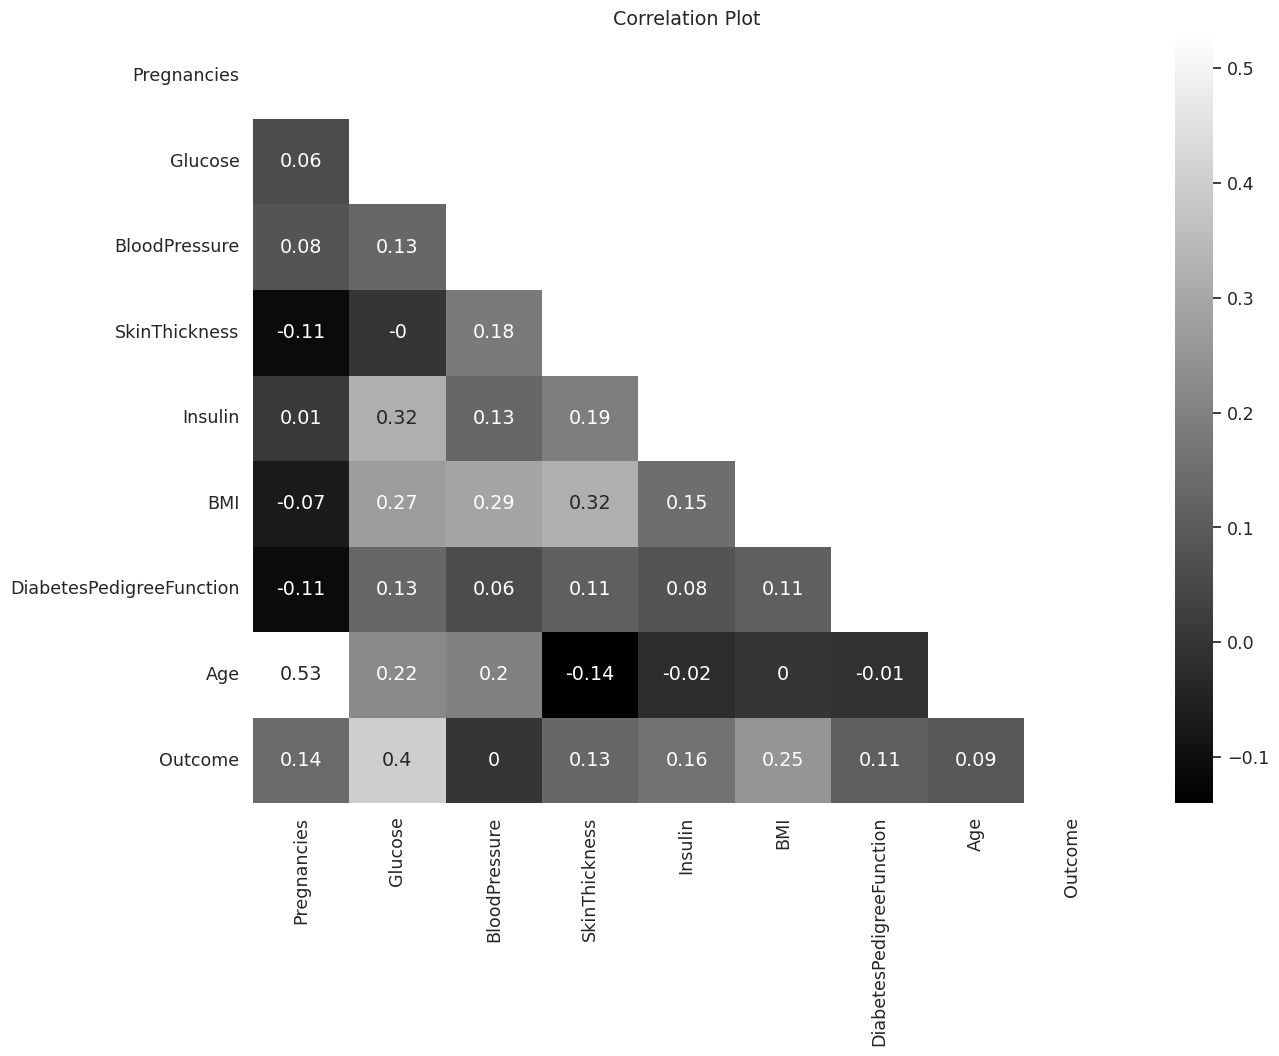

In [158]:
corr=diabetes_df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

<Figure size 1000x800 with 0 Axes>

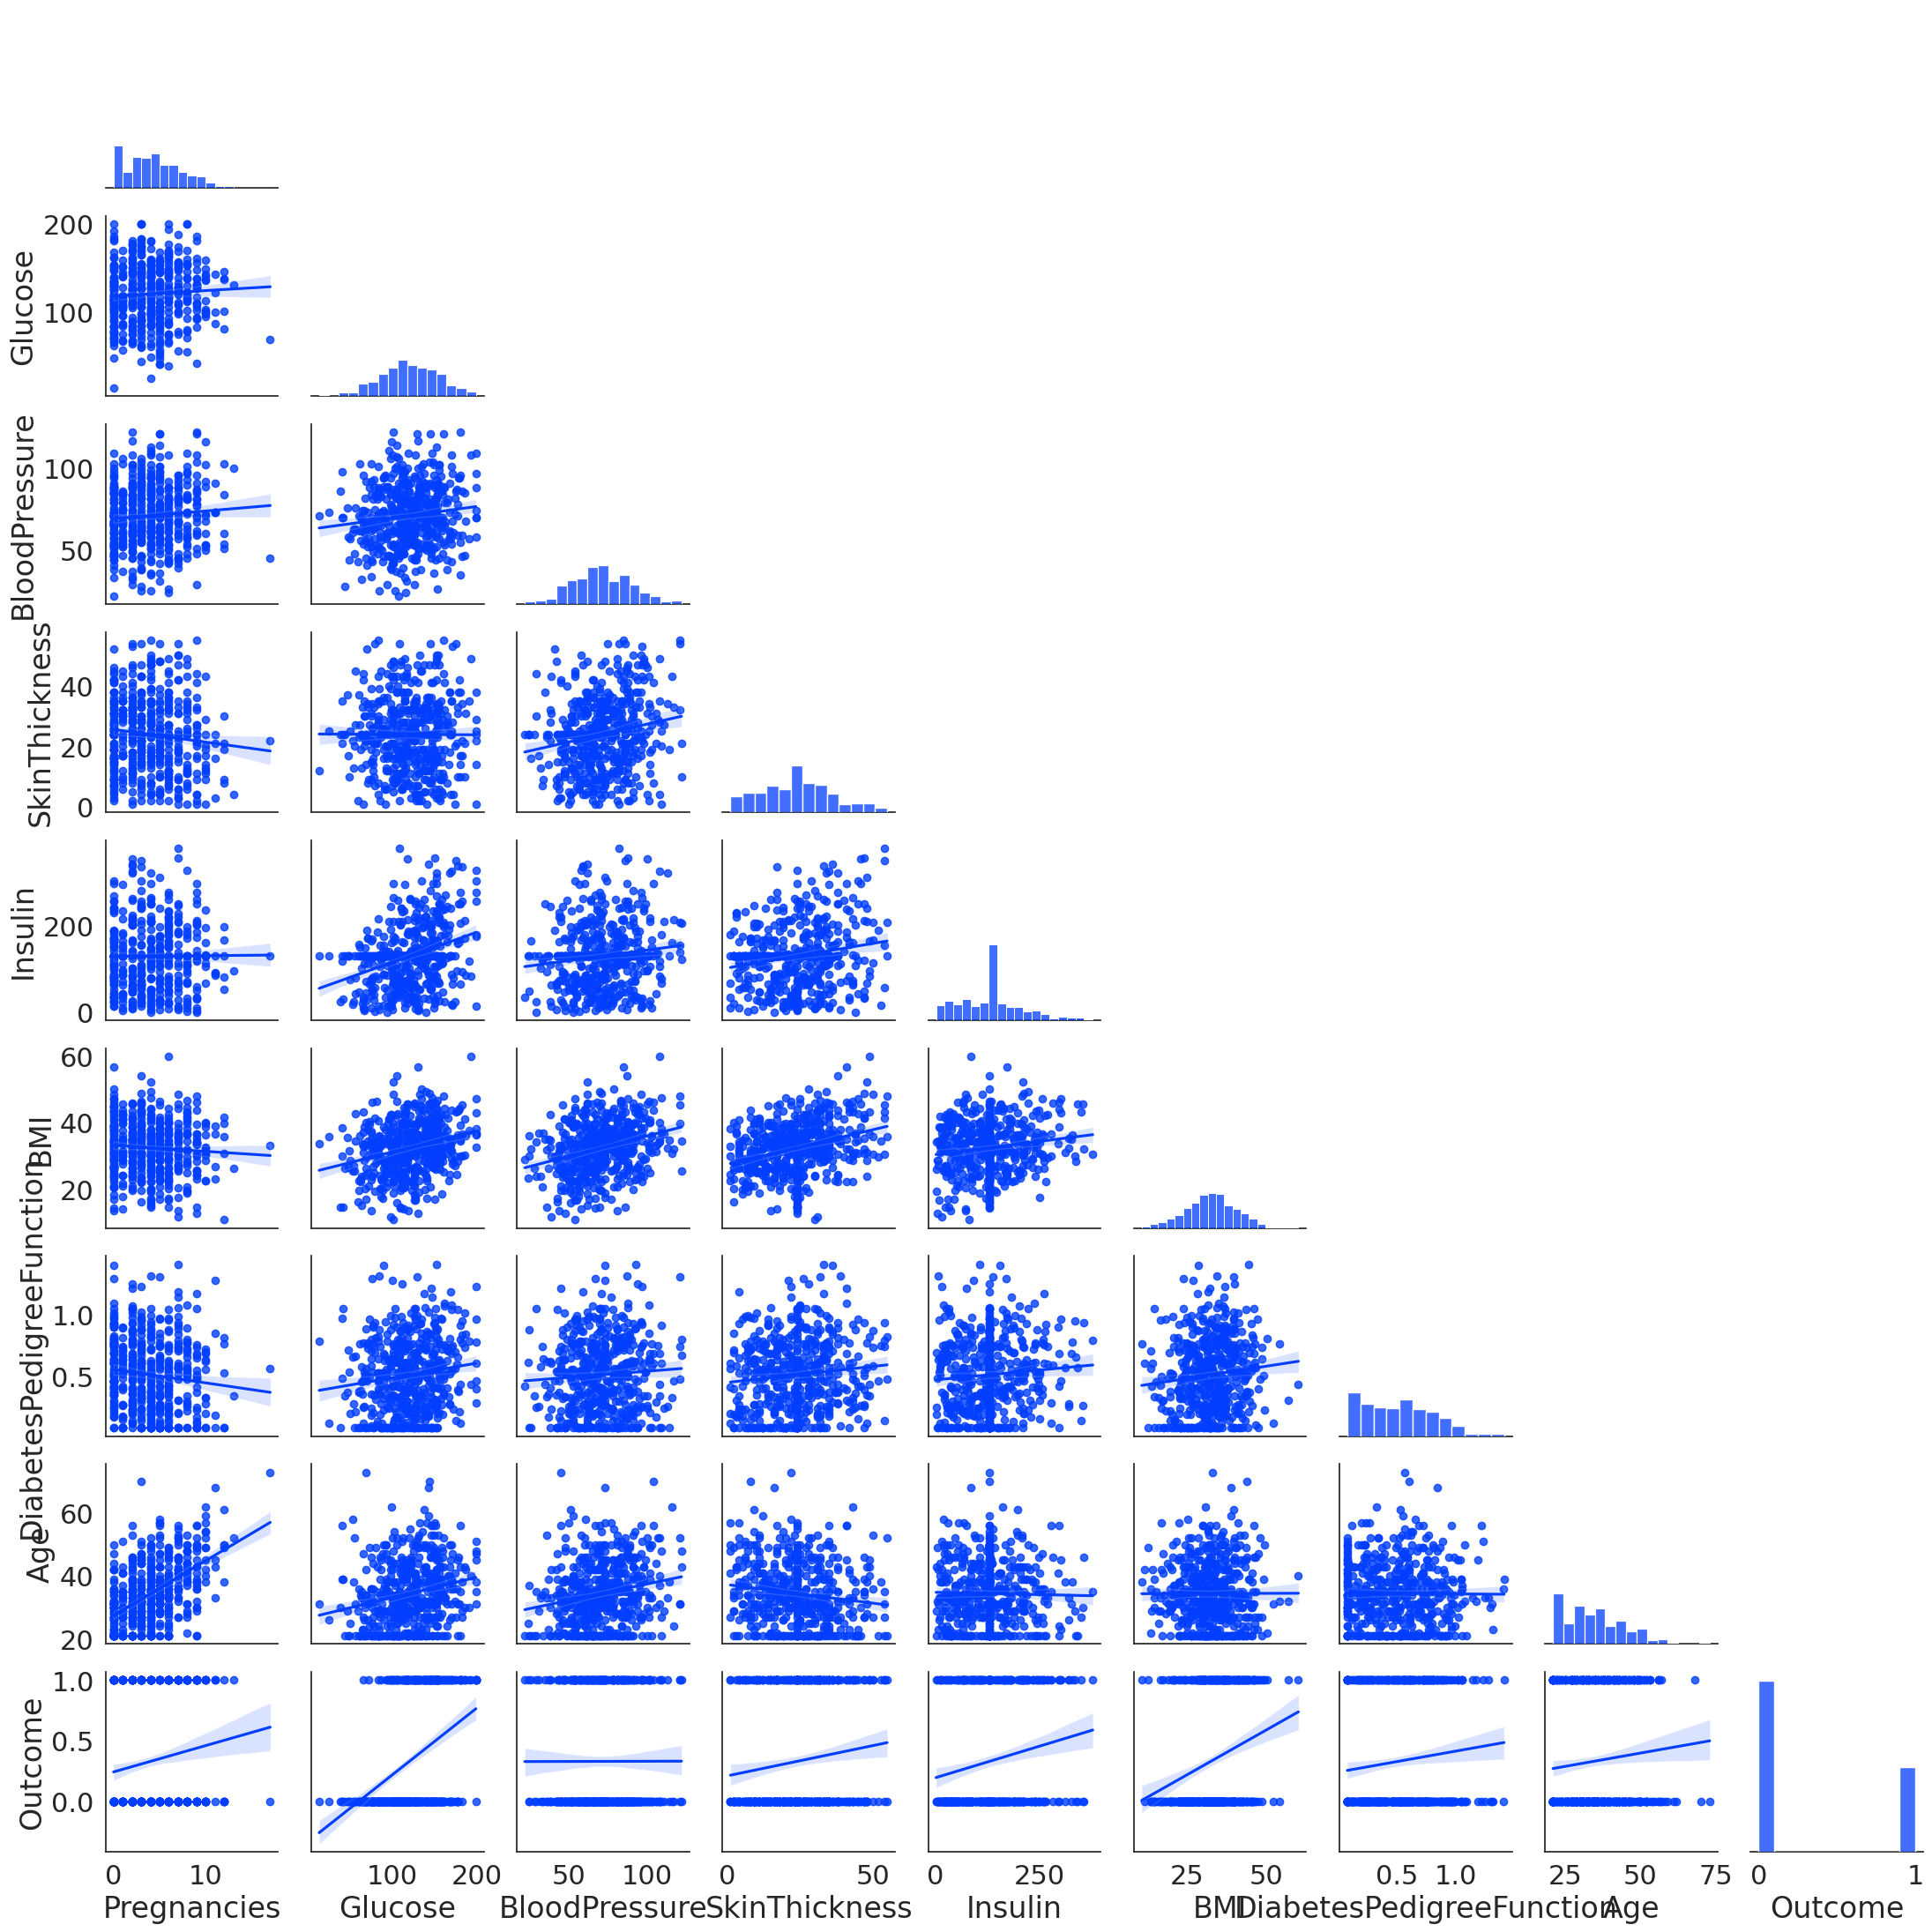

In [159]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(diabetes_df,kind = 'reg',corner = True,palette ='YlGnBu' )

In [160]:
synthetic_data.to_csv("/content/generated_04.csv", index=False) #changed file name


In [161]:
synthetic_data['Insulin'].value_counts(dropna=False)


129.375    124
106.000      5
35.000       5
68.000       4
63.000       4
          ... 
378.000      1
206.000      1
125.000      1
22.000       1
297.000      1
Name: Insulin, Length: 216, dtype: int64

In [162]:
synthetic_data.shape


(500, 9)

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [163]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data from the CSV file
def load_data(filename):
    X, Y = [], []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row if it exists
        for row in reader:
            data_point = [float(val) for val in row]
            X.append(data_point[:-1])  # All columns except the last one are features
            Y.append(data_point[-1])   # The last column is the target
    return np.array(X), np.array(Y)

def standardize_data(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    standardized_X = (X - mean) / std_dev
    return standardized_X

# Step 2: Define the multivariate linear regression model
def multivariate_linear_regression(X, Y, learning_rate=0.001, epochs=200):
    n_samples = len(X)
    n_features = len(X[0])
    weights = np.zeros(n_features)  # Initialize weights with zeros
    bias = 0  # Initialize bias

    cost_history = []  # List to store the cost at each iteration

    for epoch in range(epochs):
        for i in range(n_samples):
            x = X[i]
            y = Y[i]

            # Compute the predicted value
            y_pred = np.dot(x, weights) + bias

            # Compute the gradient of the loss with respect to weights and bias
            error = y_pred - y
            d_weights = (1/n_samples) * np.dot(x, error)
            d_bias = (1/n_samples) * np.sum(error)

            # Update the model parameters using the learning rate
            weights -= learning_rate * d_weights
            bias -= learning_rate * d_bias

        # Calculate and store the cost (MSE) at each epoch
        mse = calculate_mse(X, Y, weights, bias)
        cost_history.append(mse)

    return weights, bias, cost_history

# Step 3: Calculate Mean Squared Error (MSE)
def calculate_mse(X, Y, weights, bias):
    n_samples = len(X)
    mse = np.sum((np.dot(X, weights) + bias - Y) ** 2) / n_samples
    return mse

# Step 4: Calculate R-squared (R2) score
def calculate_r2_score(Y_true, Y_pred):
    Y_true = np.array(Y_true)
    Y_pred = np.array(Y_pred)
    y_mean = np.mean(Y_true)
    ss_res = np.sum((Y_true - Y_pred) ** 2)
    ss_tot = np.sum((Y_true - y_mean) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def train_test_split(X, Y, test_size=0.2):
    n = len(X)
    test_indices = random.sample(range(n), int(test_size * n))
    train_indices = [i for i in range(n) if i not in test_indices]
    X_train = [X[i] for i in train_indices]
    Y_train = [Y[i] for i in train_indices]
    X_test = [X[i] for i in test_indices]
    Y_test = [Y[i] for i in test_indices]
    return X_train, Y_train, X_test, Y_test

# Step 5: Load the data and perform multivariate linear regression
if __name__ == "__main__":
    X, Y = load_data("generated_04.csv")
    X = standardize_data(X)

    learning_rate = 0.01
    epochs = 100

    X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.2)

    weights, bias, cost_history = multivariate_linear_regression(X_train, Y_train, learning_rate, epochs)

    # Calculate R2 score on test data
    Y_pred_test = np.dot(X_test, weights) + bias
    r2_test = calculate_r2_score(Y_test, Y_pred_test)

    print(f"Multivariate Linear Regression: Y = {bias} + {weights} * X")
    print(f"Mean Squared Error: {calculate_mse(X_test, Y_test, weights, bias)}")
    print(f"R-squared (R2) Score on Test Data: {r2_test}")




Multivariate Linear Regression: Y = 0.2074090408501061 + [ 0.04900296  0.096607   -0.02208844  0.03011795  0.02068157  0.06125355
  0.01837764  0.00949503] * X
Mean Squared Error: 0.19258223799327692
R-squared (R2) Score on Test Data: 0.14179038327416715


In [164]:
weights

array([ 0.04900296,  0.096607  , -0.02208844,  0.03011795,  0.02068157,
        0.06125355,  0.01837764,  0.00949503])

In [165]:
X_train

[array([ 0.98166763,  0.84784136,  1.31534894, -0.40764284, -1.63010823,
         0.74492381,  0.16698914,  0.55100455]),
 array([-1.31348046,  0.90724312, -1.42935993, -1.48215594, -0.33284932,
        -0.81127293, -0.15834775, -0.73963674]),
 array([-0.32984557,  1.44185899, -0.74318271,  0.00563143,  1.51062386,
         0.08966971,  0.10027511,  0.15388415]),
 array([-0.00196727, -1.02331417, -0.53205126,  0.91483482,  0.        ,
         0.05079375,  0.04997973,  0.45172445]),
 array([-0.65772387, -0.3401939 , -0.26813694,  0.74952511,  0.0085346 ,
         0.39526557,  0.51305932, -0.34251634]),
 array([ 1.96530252,  0.84784136,  1.63204612, -0.82091711, -0.31919397,
         0.96922573,  0.57796161,  1.44452544]),
 array([-9.85602166e-01, -4.58997421e-01, -1.79883997e+00,  2.34919224e-15,
         0.00000000e+00,  3.30132451e-01, -1.15406133e+00, -1.13675714e+00]),
 array([-0.65772387,  1.08544841,  0.89308604, -1.81277535,  0.        ,
        -0.54983509, -0.39120996,  0.0546

## **_Batch Gradient Descent_**

We have first done featuure scaling, by subtracting mean then dividing it by (max-min) of each column/feature, later proceeded with batch gradient descent

In [166]:
import pandas as pd
import numpy as np

In [167]:
df = pd.read_csv('/content/generated_04.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19.0,10.000,38.387409,0.561331,40,1
1,0,151,44,6.0,105.000,26.125923,0.463959,27,1
2,3,169,57,24.0,240.000,33.224573,0.541364,36,0
3,4,86,61,35.0,129.375,32.918264,0.526311,39,0
4,6,75,62,31.0,77.000,37.453830,0.178734,21,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    float64
 4   Insulin                   500 non-null    float64
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [169]:
# Select ratio
ratio = 0.75

total_rows = df.shape[0]
train_size = int(total_rows*ratio)

# Split data into test and train
df_train = df[0:train_size]
df_test = df[train_size:]

In [170]:
# ndf_x=df.iloc[:,:8].to_numpy()
ndf_x=df_train.iloc[:,:8].to_numpy()

In [171]:
ndf_y=df_train.iloc[:,[8]].to_numpy()

In [172]:
ndf_x

array([[  7.        , 149.        ,  96.        , ...,  38.38740931,
          0.5613309 ,  40.        ],
       [  0.        , 151.        ,  44.        , ...,  26.1259232 ,
          0.4639594 ,  27.        ],
       [  3.        , 169.        ,  57.        , ...,  33.22457298,
          0.54136377,  36.        ],
       ...,
       [  3.        , 116.        ,  92.        , ...,  43.25967386,
          0.47676083,  33.        ],
       [  2.        , 108.        ,  91.        , ...,  34.74993884,
          0.41291055,  21.        ],
       [  2.        , 125.        ,  54.        , ...,  33.15205425,
          0.22688252,  25.        ]])

In [173]:
#do scaling of features
ndf_avg = np.mean(ndf_x, axis = 0)
ndf_avg

array([  4.072     , 121.22933333,  71.43733333,  23.74654945,
       129.63166667,  32.67226174,   0.53174403,  34.43466667])

In [174]:
ndf_max = np.max(ndf_x, axis = 0)
ndf_max

array([ 17.        , 199.        , 122.        ,  55.        ,
       378.        ,  59.93741155,   1.41387391,  73.        ])

In [175]:
ndf_min = np.min(ndf_x, axis = 0)
ndf_min

array([ 0.       , 14.       , 22.       ,  1.       ,  1.       ,
       10.9033396,  0.078    , 21.       ])

In [176]:
ndf_mx_mn= ndf_max-ndf_min
ndf_mx_mn

array([ 17.        , 185.        , 100.        ,  54.        ,
       377.        ,  49.03407195,   1.33587391,  52.        ])

In [177]:
mxmn_szd=np.tile(ndf_mx_mn, (df_train.shape[0], 1))
mxmn_szd

array([[ 17.        , 185.        , 100.        , ...,  49.03407195,
          1.33587391,  52.        ],
       [ 17.        , 185.        , 100.        , ...,  49.03407195,
          1.33587391,  52.        ],
       [ 17.        , 185.        , 100.        , ...,  49.03407195,
          1.33587391,  52.        ],
       ...,
       [ 17.        , 185.        , 100.        , ...,  49.03407195,
          1.33587391,  52.        ],
       [ 17.        , 185.        , 100.        , ...,  49.03407195,
          1.33587391,  52.        ],
       [ 17.        , 185.        , 100.        , ...,  49.03407195,
          1.33587391,  52.        ]])

In [178]:
avg_szd=np.tile(ndf_avg, (df_train.shape[0], 1))
avg_szd

array([[  4.072     , 121.22933333,  71.43733333, ...,  32.67226174,
          0.53174403,  34.43466667],
       [  4.072     , 121.22933333,  71.43733333, ...,  32.67226174,
          0.53174403,  34.43466667],
       [  4.072     , 121.22933333,  71.43733333, ...,  32.67226174,
          0.53174403,  34.43466667],
       ...,
       [  4.072     , 121.22933333,  71.43733333, ...,  32.67226174,
          0.53174403,  34.43466667],
       [  4.072     , 121.22933333,  71.43733333, ...,  32.67226174,
          0.53174403,  34.43466667],
       [  4.072     , 121.22933333,  71.43733333, ...,  32.67226174,
          0.53174403,  34.43466667]])

In [179]:
ndfx_scld=(ndf_x-avg_szd)/(mxmn_szd)
ndfx_scld

array([[ 0.17223529,  0.15011171,  0.24562667, ...,  0.11655462,
         0.02214795,  0.10702564],
       [-0.23952941,  0.16092252, -0.27437333, ..., -0.13350591,
        -0.05074179, -0.14297436],
       [-0.06305882,  0.25821982, -0.14437333, ...,  0.01126383,
         0.00720108,  0.03010256],
       ...,
       [-0.06305882, -0.02826667,  0.20562667, ...,  0.2159195 ,
        -0.04115897, -0.02758974],
       [-0.12188235, -0.07150991,  0.19562667, ...,  0.04237211,
        -0.08895561, -0.25835897],
       [-0.12188235,  0.02038198, -0.17437333, ...,  0.00978488,
        -0.22821129, -0.1814359 ]])

In [180]:
ndf_y

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [181]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19.0,10.000,38.387409,0.561331,40,1
1,0,151,44,6.0,105.000,26.125923,0.463959,27,1
2,3,169,57,24.0,240.000,33.224573,0.541364,36,0
3,4,86,61,35.0,129.375,32.918264,0.526311,39,0
4,6,75,62,31.0,77.000,37.453830,0.178734,21,0


In [182]:
n_samples = df_train.shape[0]  # No. of samples taken
n_features = df.shape[1]-1  # No. of features / No. of values in x
n_targets = 1  # we have only 1 target outcome

In [183]:
import numpy as np

# Define your loss function
def loss_fn(y_hat, y):
    return np.mean((y_hat - y) ** 2)

# Define your hyperparameters
learning_rate = 0.001
num_epochs = 1000

# Initialize W and b based on your actual dimensions
W = np.random.normal(size=(n_targets, n_features))
b = np.random.normal(size=(n_targets, 1))

loss_history = []

for epoch in range(num_epochs):
    loss_a = np.zeros((n_targets, n_features), dtype=np.float64)
    loss_b = np.zeros((n_targets, 1), dtype=np.float64)
    loss = 0

    for i in range(n_samples):
        X_i, y_i = ndfx_scld[i], ndf_y[i]
        y_hat = np.dot(W, X_i) + b

        dL_dy = 2 * (y_hat - y_i)
        dy_dW = X_i
        dy_db = 1

        dL_dW = dL_dy * dy_dW
        loss_a += dL_dW

        dL_db = dL_dy * dy_db
        loss_b += dL_db
        loss += loss_fn(y_hat, y_i)

    W -= learning_rate * loss_a
    b -= learning_rate * loss_b

    loss_history.append(loss)
    print("Epoch: {}, Loss: {}".format(epoch + 1, loss))


Epoch: 1, Loss: 231.33442686093133
Epoch: 2, Loss: 170.10757418070017
Epoch: 3, Loss: 159.46662293434946
Epoch: 4, Loss: 152.566131925279
Epoch: 5, Loss: 146.42499648666157
Epoch: 6, Loss: 140.80872765068068
Epoch: 7, Loss: 135.65909813526235
Epoch: 8, Loss: 130.93304760099915
Epoch: 9, Loss: 126.59221062471778
Epoch: 10, Loss: 122.60189825291711
Epoch: 11, Loss: 118.9307061437892
Epoch: 12, Loss: 115.55019407957973
Epoch: 13, Loss: 112.43459896712037
Epoch: 14, Loss: 109.56057609329682
Epoch: 15, Loss: 106.90696572683052
Epoch: 16, Loss: 104.45458255886642
Epoch: 17, Loss: 102.18602573031804
Epoch: 18, Loss: 100.08550741739681
Epoch: 19, Loss: 98.13869814760659
Epoch: 20, Loss: 96.33258719936346
Epoch: 21, Loss: 94.65535660132966
Epoch: 22, Loss: 93.09626739429477
Epoch: 23, Loss: 91.64555695062428
Epoch: 24, Loss: 90.29434626537248
Epoch: 25, Loss: 89.03455624041443
Epoch: 26, Loss: 87.85883207958351
Epoch: 27, Loss: 86.76047499985211
Epoch: 28, Loss: 85.733380542012
Epoch: 29, Loss:

In [184]:
W

array([[ 0.38183121,  1.03240145, -0.2172194 ,  0.31115492, -0.12662233,
         0.48786513,  0.01151499, -0.03261999]])

In [185]:
b

array([[0.36]])

## **_Insights drawn (plots, markdown explanations)_**

From the graphs below, we understand that linear regression is not a good model for classification task as although the model is doing okish with trained data the model fails to do well with the test data, this is observed in both batch and stochastic gradient decent. And from the cost functions we understand that gradient descent takes lesser number of iterations than stochastic but then it consumes more time for computation of total gradient of all samples at every iterations.

In [186]:
from matplotlib import pyplot as plt

In [187]:
#scaling test data to jsut in case but observed no change after scaling which was expected
tndf_x=df_test.iloc[:,:8].to_numpy()

tndf_y=df_test.iloc[:,[8]].to_numpy()

#do scaling of features
tndf_avg = np.mean(ndf_x, axis = 0)


tndf_max = np.max(ndf_x, axis = 0)


tndf_min = np.min(ndf_x, axis = 0)


tndf_mx_mn= tndf_max-tndf_min


tmxmn_szd=np.tile(tndf_mx_mn, (df_test.shape[0], 1))


tavg_szd=np.tile(tndf_avg, (df_test.shape[0], 1))


tndfx_scld=(tndf_x-tavg_szd)/(tmxmn_szd)


In [188]:
# Customize the font size globally for various elements
plt.rc('font', size=8)         # Set the font size for labels, titles, and tick labels
plt.rc('axes', titlesize=7)     # Set the font size for plot titles

We see that when a scatter plot of predicted results(y_pred/Y_pred_test) and actual results(ndf_y/Y_test) is plotted then batch gradient seems to perform better for this data set as it has less scattered away points all across x=0 and x=1 whereas stochastic has more scatterring away from 0 and 1 meaning it has less accurate predictions.

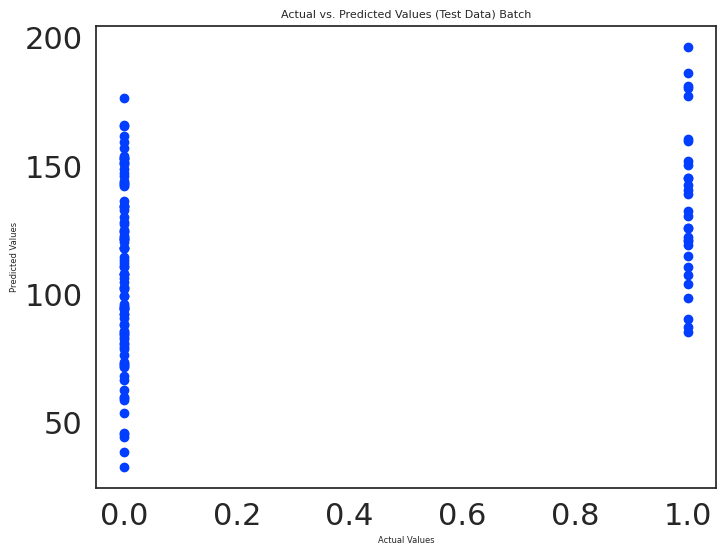

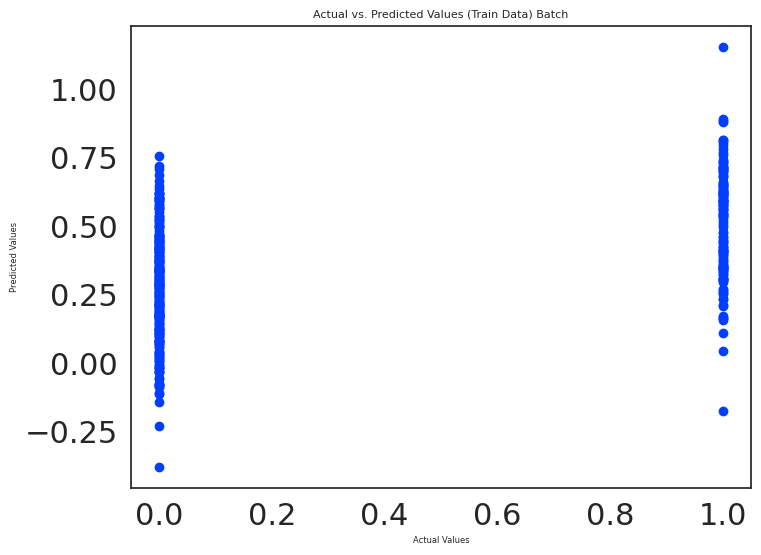

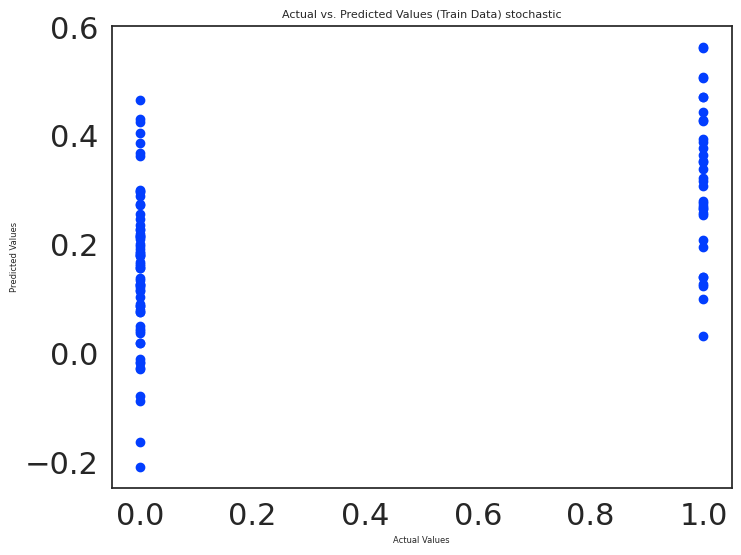

In [189]:
# # # Plot the regression line
# plt.scatter(ndfx_scld, ndf_y.T, label='Data')
# plt.plot(X, y_hat_arr, color='red', label='Regression Line')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

# Assuming you have the training data 'X_train' and the true target values 'y_train'
plt.figure(figsize=(6, 4))
y_pred = np.dot(tndf_x, W[0].T) + b[0][0]
plt.scatter(tndf_y, y_pred)
plt.xlabel('Actual Values', fontsize=4)
plt.ylabel('Predicted Values', fontsize=4)
plt.title('Actual vs. Predicted Values (Test Data) Batch', fontsize=8)
plt.show()

# Assuming you have the training data 'X_train' and the true target values 'y_train'
plt.figure(figsize=(6, 4))
y_pred = np.dot(ndfx_scld, W[0].T) + b[0][0]
plt.scatter(ndf_y, y_pred)
plt.xlabel('Actual Values', fontsize=4)
plt.ylabel('Predicted Values', fontsize=4)
plt.title('Actual vs. Predicted Values (Train Data) Batch', fontsize=8)
plt.show()

#for stochastic
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_test)
plt.xlabel('Actual Values', fontsize=4)
plt.ylabel('Predicted Values', fontsize=4)
plt.title('Actual vs. Predicted Values (Train Data) stochastic', fontsize=8)
plt.show()



We see in the cost vs epochs plot that bgd has sudden drop in cost in the starting iterations and then stabalizes for rest of the iterations meaning that cost decreses drastically in the first iterations and then slowly start to decrese less whereas in sgd cost decreases in a smooth constant curve and no sudden decrease in seen no matter what iteration at what point is happenning.

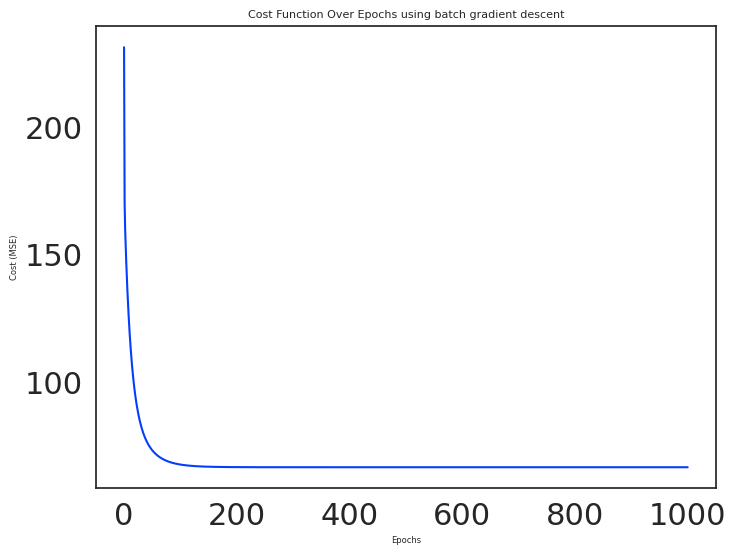

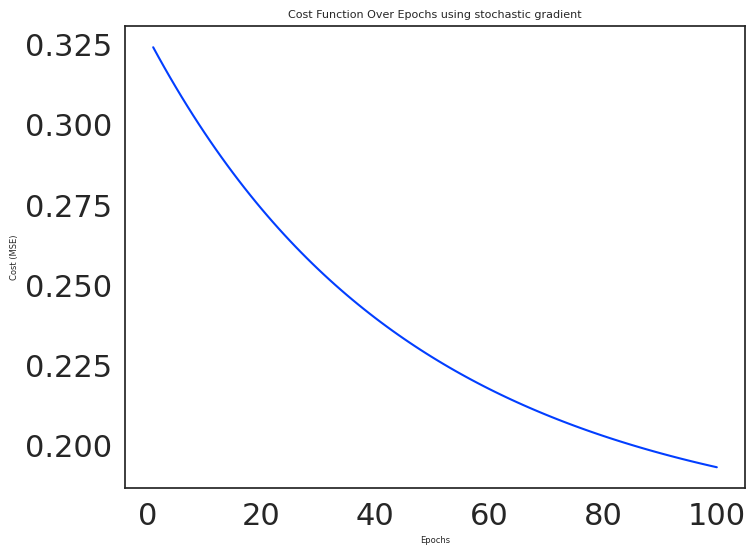

In [190]:
# Plot the cost function over epochs
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_epochs + 1), loss_history)
plt.xlabel('Epochs', fontsize=4)
plt.ylabel('Cost (MSE)', fontsize=4)
plt.title('Cost Function Over Epochs using batch gradient descent', fontsize=6)
plt.show()


# Plot the cost function over epochs
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), cost_history)
plt.xlabel('Epochs', fontsize=4)
plt.ylabel('Cost (MSE)', fontsize=4)
plt.title('Cost Function Over Epochs using stochastic gradient', fontsize=6)
plt.show()

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

In [191]:
class LassoRegression:
    """
    This class implements the Lasso Regression model from scratch.
    Lasso regression is a type of linear regression that uses shrinkage.
    Shrinkage is where data values are shrunk towards a central point, like the mean.
    A tuning parameter, lambda controls the strength of the L1 penalty.
    """

    def __init__(self, learning_rate= 0.01, n_iters= 10, lambda_l= 0.5):
        self.lr = learning_rate
        self.iterations = n_iters
        self.lambda_l = lambda_l
        self.theta = None
        self.bias = None
        self.loss = []

    def _linear_model(self, X):
        """
        Compute the linear model for the given feature matrix.

        Args:
            X (numpy.ndarray): the feature matrix to compute.

        Returns:
            numpy.ndarray: the computed linear model.
        """
        return np.dot(X, self.theta) + self.bias

    def _initialize_parameters(self, n_features):
        """
        Initialize the weights and bias with random values.

        Args:
            n_features (int): the number of features in the dataset.
        """
        self.theta = np.random.random_sample(n_features)
        self.bias = np.random.random_sample()

    def _compute_theta_derivative(self, X, y, linear_model):
        """
        Compute the derivative of theta for the given feature matrix, target vector, and linear model.

        Args:
            X (numpy.ndarray): the feature matrix.
            y (numpy.ndarray): the target vector.
            linear_model (numpy.ndarray): the computed linear model.

        Returns:
            numpy.ndarray: the computed derivative of theta.
        """
        n_samples, n_features = X.shape
        d_theta = np.zeros(n_features)

        for j in range(n_features):
            if self.theta[j] > 0:
            #This condition checks whether the current value of the feature coefficient (theta) is positive.
                d_theta[j] = -(2/n_samples) * (np.dot(X[:, j], (y - linear_model)) + self.lambda_l)
            else:
                d_theta[j] = -(2/n_samples) * (np.dot(X[:, j], (y - linear_model)) - self.lambda_l)

        return d_theta



    def _compute_bias_derivative(self, X, y, linear_model):
        """
        Compute the derivative of the bias for the given feature matrix, target vector, and linear model.

        Args:
            X (numpy.ndarray): The feature matrix.
            y (numpy.ndarray): The target vector.
            linear_model (numpy.ndarray): The predicted target values (linear model output).

        Returns:
            float: The derivative of the bias.
        """
        d_bias = -(2/X.shape[0]) * np.sum(y - linear_model)
        return d_bias

    def _validate_inputs(self, X, y):
        """
        Validate the dimensions of the feature matrix and the target vector.

        Args:
            X (numpy.ndarray): The feature matrix.
            y (numpy.ndarray): The target vector.

        Raises:
            AssertionError: If the number of samples in the feature matrix and the target vector is not equal.
        """
        assert X.shape[0] == y.shape[0], 'The number of samples in the feature matrix and the target vector should be equal.'

    def _calculate_cost(self, y, z):
        """
        Calculate the Lasso cost (error) for the given target, prediction, and lambda.

        Args:
            y (numpy.ndarray): The true target values.
            z (numpy.ndarray): The predicted target values.

        Returns:
            float: The calculated Lasso cost (root mean squared error + L1 penalty).
        """
        n_samples = y.shape[0]
        lasso_loss = (1/n_samples) * np.sum(np.square(y - z)) + (self.lambda_l * np.sum(np.abs(self.theta)))
        return np.sqrt(lasso_loss)

    def fit(self, X, y):
        self._validate_inputs(X, y)
        self._initialize_parameters(X.shape[1])

        for _ in range(self.iterations):
            linear_model = self._linear_model(X)
            d_theta = self._compute_theta_derivative(X, y, linear_model)
            d_bias = self._compute_bias_derivative(X, y, linear_model)
            self.theta -= self.lr * d_theta
            self.bias -= self.lr * d_bias
            self.loss.append(self._calculate_cost(y, linear_model))

    def predict(self, X):
        """
        Predict the target value for the given feature matrix.

        Args:
            X (numpy.ndarray): the feature matrix to predict.

        Returns:
            numpy.ndarray: the predicted target values.
        """
        return self._linear_model(X)

    def cost(self):
        """
        Return the computed loss for the model.

        Returns:
            list: the list of loss values for each iteration.
        """
        return self.loss



In [192]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def my_plot(cost):
    iterations = [i for i in range(1, 11)]
    fig, ax = plt.subplots()
    ax.plot(iterations, cost, color='red')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Cost vs Iterations')

def surface_plot(X, y, prediction, degree):
    fig = plt.figure(figsize=[30, 50])
    ax = fig.add_subplot(5, 2, degree, projection='3d')

    ax.scatter(X[:,0], X[:,1], y, zdir='z', s=20, c='#9467bd', depthshade=True)

    Y_plot = np.asarray(prediction) #converting the prediction data to a numpy array.
    X = np.asarray(X)

    ax.plot_trisurf(X[:, 0], X[:, 1], Y_plot, cmap = 'viridis')
    ax.set_xlabel('$Age$', fontsize=10, rotation=150)
    ax.set_ylabel('$BMI$', fontsize=10, rotation=150)
    ax.set_zlabel('$Insurance$', fontsize=10, rotation=60)
    ax.set_title('Degree: ' + str(degree), fontsize=20)
    plt.show()

In [193]:
from sklearn.preprocessing import PolynomialFeatures
#  This class is used to generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

poly = PolynomialFeatures(9, include_bias= False)

X = synthetic_data.iloc[:, :8]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,149,96,19.0,10.000,38.387409,0.561331,40
1,0,151,44,6.0,105.000,26.125923,0.463959,27
2,3,169,57,24.0,240.000,33.224573,0.541364,36
3,4,86,61,35.0,129.375,32.918264,0.526311,39
4,6,75,62,31.0,77.000,37.453830,0.178734,21


In [194]:
X = poly.fit_transform(X)

""" standardizing features.
first subtracts the mean of each feature (column-wise, as specified by axis=0), and then divides the result by the standard deviation of each feature. This process is also known as z-score normalization or standard scaling. The outcome is that your features will have a mean of 0 and a standard deviation of 1.
"""
X = (X - X.mean(axis= 0)) / X.std(axis= 0)

y = synthetic_data.iloc[:, 8]

In [195]:
from sklearn.model_selection import train_test_split

X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X, y)

y_train_k = y_train_k.to_numpy()

y_test_k = y_test_k.to_numpy()

In [196]:
lasso = LassoRegression(learning_rate= 0.01, n_iters= 10, lambda_l= 0.5)
lasso.fit(X_train_k, y_train_k)
y_predicted_l_k = lasso.predict(X_train_k)
cost_lasso = lasso.cost()

## **_Ridge Regression_**

In [197]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [198]:
teams = pd.read_csv("/content/generated_04.csv")

In [199]:
def ridge_fit(X,y,alpha):
    x_mean=X.mean()
    x_std=X.std()

    X=(X-x_mean)/x_std

    penalty = alpha * np.identity(X.shape[1])
    penalty[0][0]=0

    A=np.dot(X.T, y)
    B=np.linalg.inv((X.T @ X) + penalty)@A
    return B

In [200]:
def ridge_predict(test_X,B):
    x_mean=test_X.mean()
    x_std=test_X.std()
    test_X=(test_X- x_mean)/x_std

    predictions=np.dot(test_X,B)
    return predictions

In [201]:
def generate_polynomial_features(X, degree):
    if degree < 1:
        raise ValueError("Degree must be at least 1.")

    n_samples, n_features = X.shape
    X_poly = np.ones((n_samples, 1))  # Initialize with a column of ones (bias term)

    for d in range(1, degree + 1):
        for feature in range(n_features):
            new_feature = X[:, feature].reshape(-1, 1) ** d
            X_poly = np.hstack((X_poly, new_feature))

    return X_poly

In [202]:
predictors=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
target="Outcome"

In [203]:
train, test = train_test_split(teams, test_size=0.2, random_state=1)
X_train = train[predictors].copy()
y_train = train[[target]].copy()
X_test = test[predictors].copy()
y_test = test[[target]].copy()

X_tra=generate_polynomial_features(X_train.to_numpy(),2)
X_tes=generate_polynomial_features(X_test.to_numpy(),2)



In [204]:
y_train

,Outcome
238,1
438,0
475,0
58,0
380,0
...,...
255,0
72,0
396,0
235,1


In [205]:
B=ridge_fit(X_tra,y_train,0.005)
y_pred=ridge_predict(X_tes,B)

In [206]:
print(B)
print(B.shape)

[[-1.45758212e+01]
 [ 1.00505431e+00]
 [ 1.02359485e+00]
 [-5.82841134e-01]
 [ 6.06971446e-01]
 [ 1.57242083e+00]
 [ 1.39358790e-02]
 [ 3.86241849e-02]
 [ 1.96524188e-01]
 [ 9.28930809e+00]
 [ 1.90402581e-01]
 [-1.77181220e-01]
 [ 5.73240227e-01]
 [-6.62263258e-03]
 [ 1.41493569e+00]
 [ 3.17093465e-02]
 [-1.22486676e-01]]
(17, 1)


In [207]:
y_pred

array([[ 0.02845395],
       [ 0.90118155],
       [ 0.46818708],
       [ 0.15126193],
       [ 0.51958735],
       [ 0.20622684],
       [ 0.58843275],
       [ 0.0900462 ],
       [ 0.27028647],
       [ 0.70903371],
       [ 0.32061336],
       [ 0.04624382],
       [ 0.59392052],
       [ 0.2066136 ],
       [ 0.39918854],
       [ 0.45552006],
       [ 0.10862233],
       [ 0.46060109],
       [ 0.70477254],
       [ 0.42642466],
       [ 0.11314603],
       [ 0.65080885],
       [ 0.32629914],
       [ 0.28992583],
       [ 0.03188381],
       [ 0.41223067],
       [ 0.26265076],
       [ 0.15408431],
       [ 0.39101906],
       [ 0.52934473],
       [ 0.0589499 ],
       [ 0.36287771],
       [ 0.26744656],
       [ 0.5303745 ],
       [ 0.4633887 ],
       [ 0.42209596],
       [ 0.34126243],
       [ 0.25410488],
       [ 0.21462291],
       [ 0.02875982],
       [ 0.04488191],
       [ 0.02789094],
       [ 0.61736097],
       [ 0.08741565],
       [ 1.03361187],
       [ 0

In [208]:
from sklearn.metrics import mean_squared_error
best_alpha = None
best_mse = float('inf')
alphas=10**np.linspace(10,-2,100)*0.5
# Iterate over alpha values and train models

train, test = train_test_split(teams, test_size=0.2, random_state=1)
X_train = train[predictors].copy()
y_train = train[[target]].copy()
X_test = test[predictors].copy()
y_test = test[[target]].copy()
degree=2
X_tra=generate_polynomial_features(X_train.to_numpy(),degree)
X_tes=generate_polynomial_features(X_test.to_numpy(),degree)


mse_values=[]
for alpha in alphas:

    B=ridge_fit(X_tra,y_train,alpha)
    y_pred=ridge_predict(X_tes,B)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print(best_alpha)

0.005


## **_Insights drawn (plots, markdown explanations)_**

Plots showing the relationship between all 8 features in Lasso.

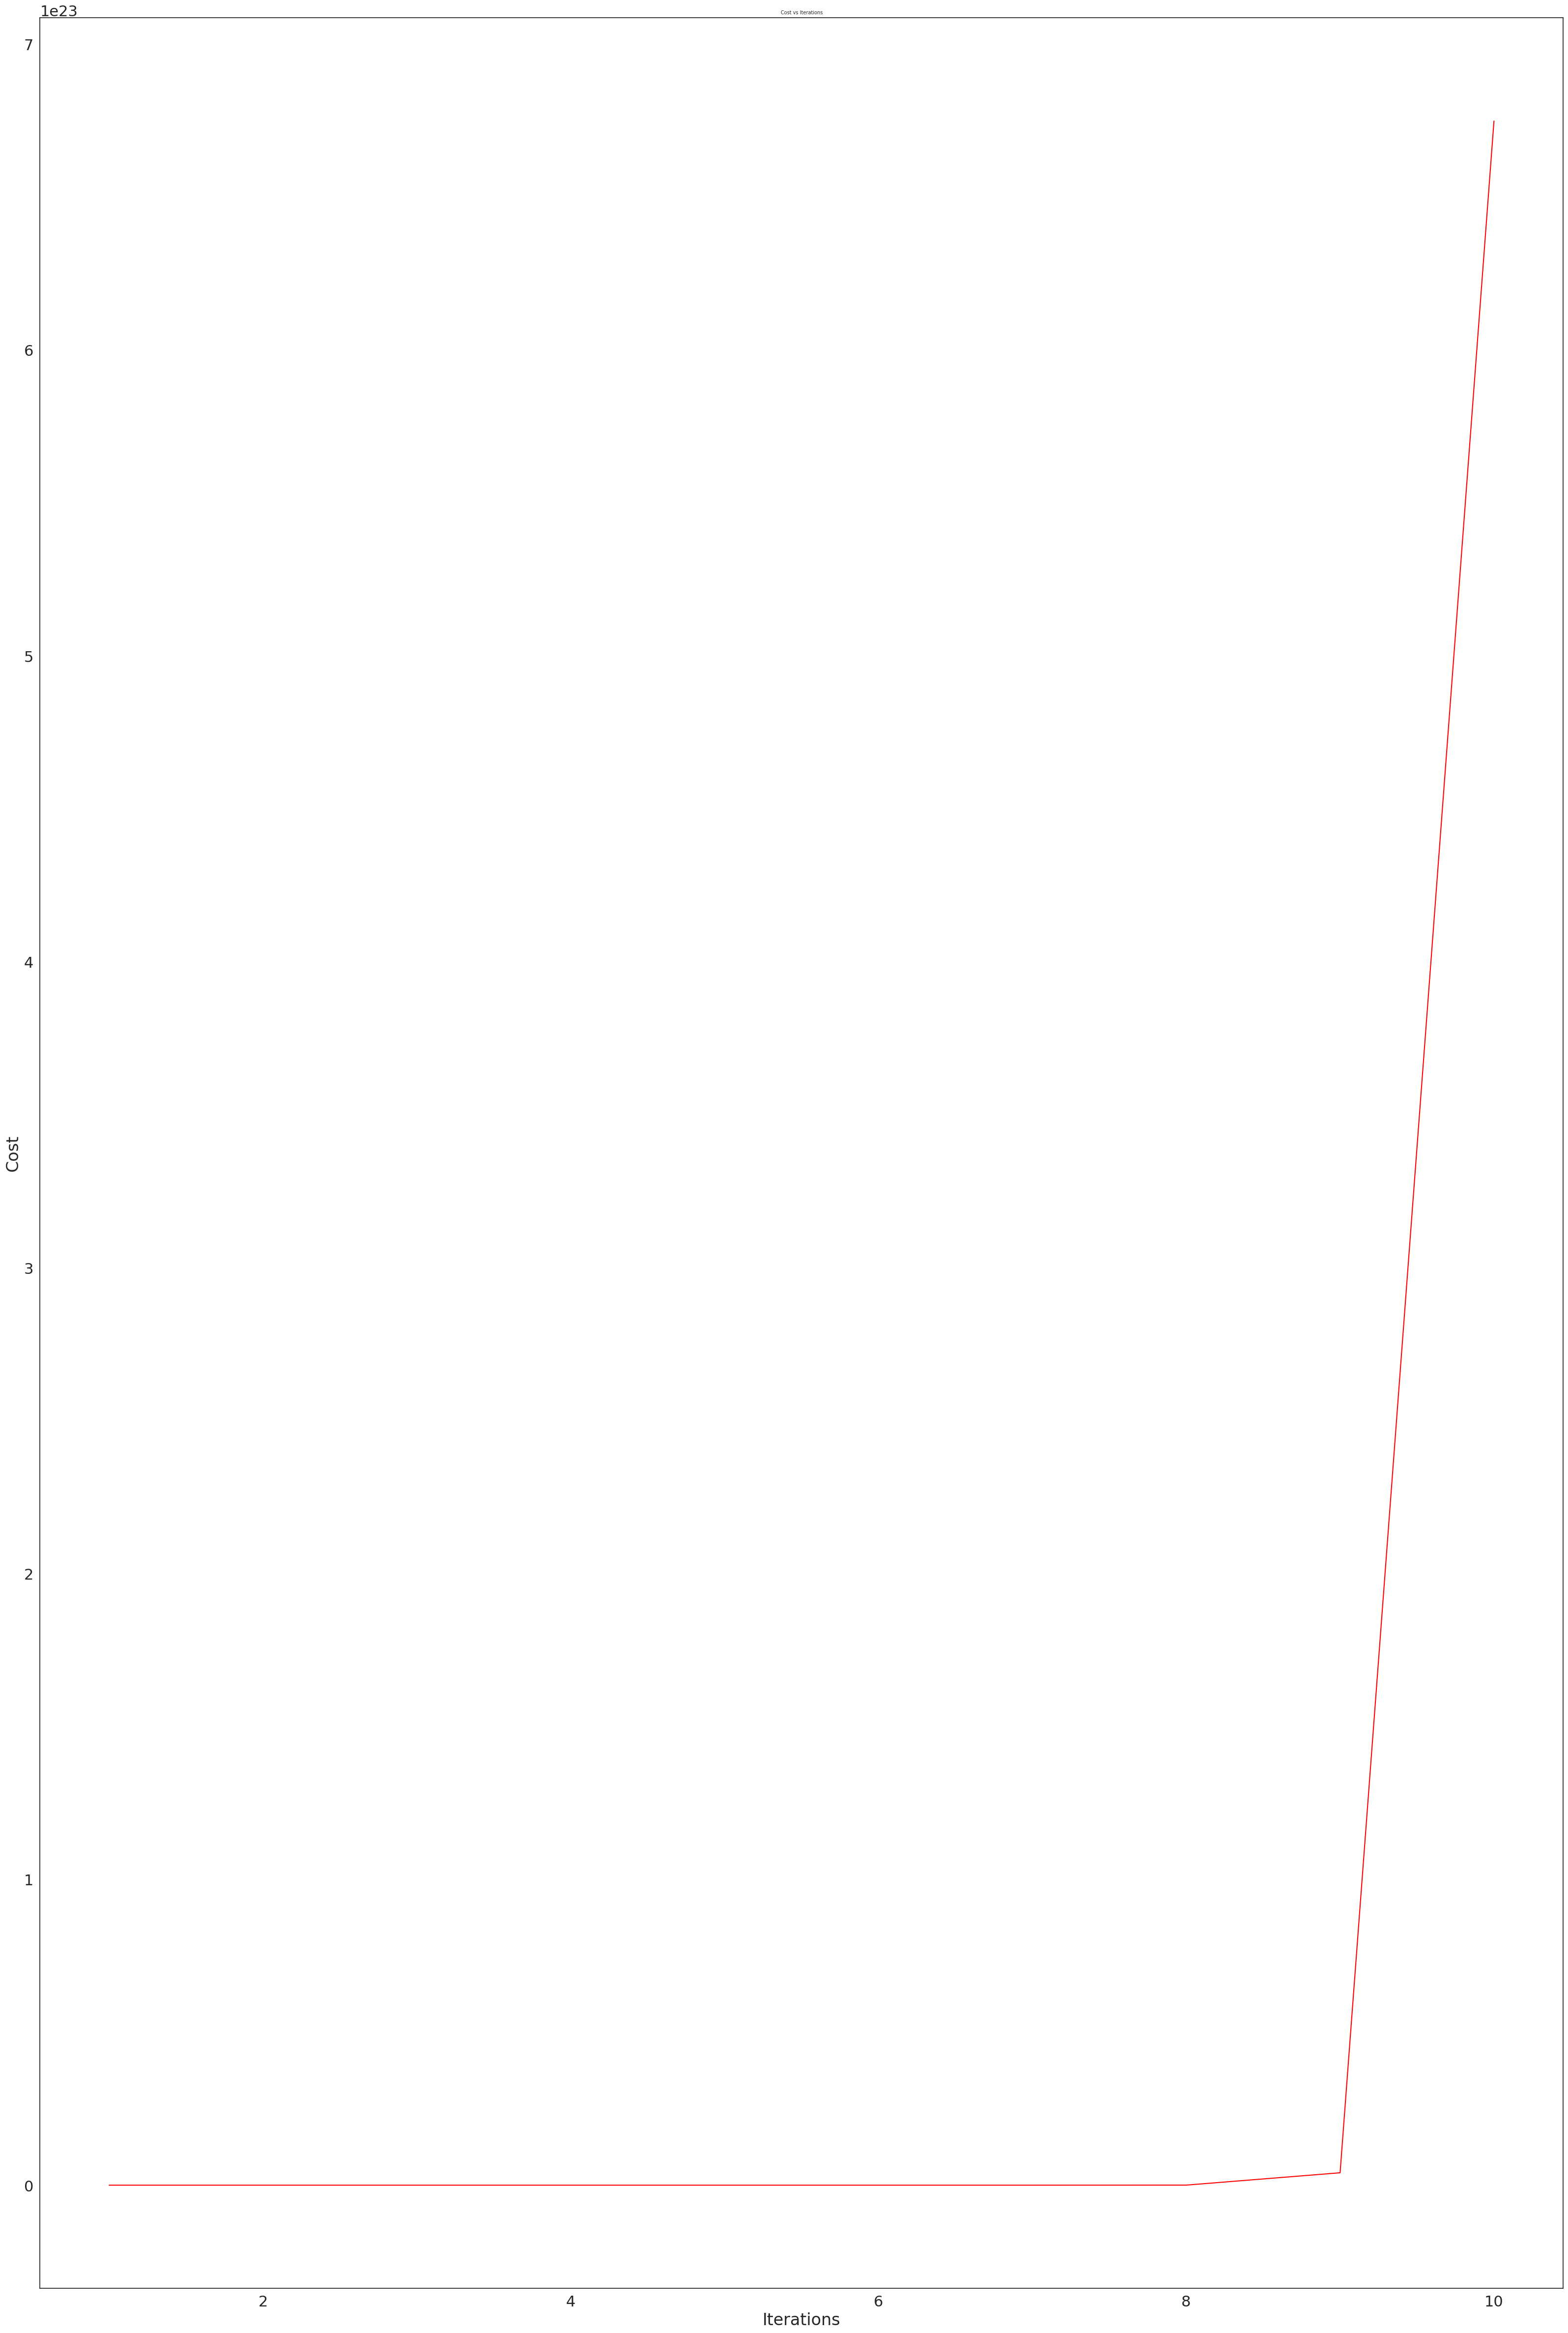

In [209]:
my_plot(cost_lasso)



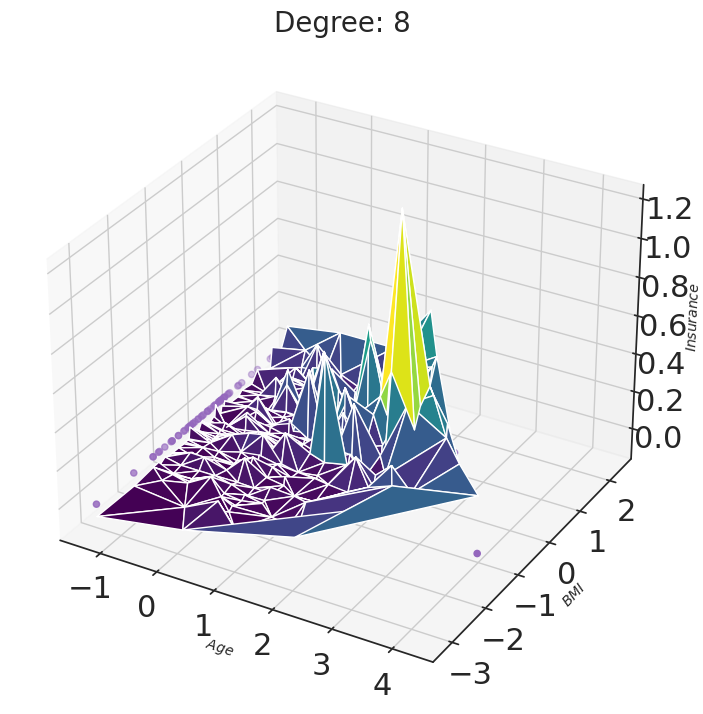

In [210]:
surface_plot(X_train_k, y_train_k, y_predicted_l_k, 8)


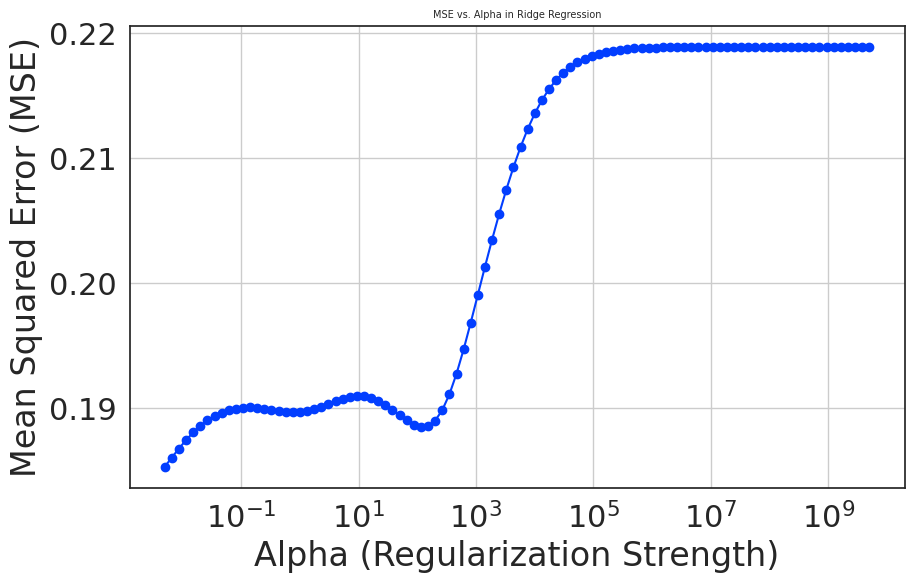

In [211]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. Alpha in Ridge Regression')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')  # Use a logarithmic scale for alpha values
plt.grid(True)
plt.show()

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

In [212]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.01, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_features,n_samples = X.shape
        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(self.weights.T,X) + self.bias
            predictions = sigmoid(linear_pred)
            dw = (1/n_samples) * np.dot(predictions - y,X.T)
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw.T
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(self.weights.T,X) + self.bias
        y_pred = sigmoid(linear_pred)
#         class_pred = [0 if y<=0.5 else 1 for y in y_pred
        y_scores = y_pred
        y_pred=y_pred>0.65
        y_pred = np.array(y_pred, dtype = 'int64')
        return y_pred

    def predict_proba(self, X):
        linear_pred = np.dot(self.weights.T, X) + self.bias
        y_proba = sigmoid(linear_pred)
        return np.hstack((1 - y_proba, y_proba))


def feature_scaling(X):
    n_features = X.shape[0]
    for i in range(n_features):
        mean = np.mean(X[i, :])
        std_dev = np.std(X[i, :])
        X[i, :] = (X[i, :] - mean) / std_dev
    return X



import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv("/content/generated_04.csv")
# train_set,test_set=split_train_test(data,0.2)
# X_train=train_set.drop("Outcome",axis=1)
# y_train=train_set[["Outcome"]]
# X_test=test_set.drop("Outcome",axis=1)
# y_test=test_set[["Outcome"]]

X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target
split_index = int(0.8 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# X_train = X_train.values
# y_train = y_train.values
# X_test = X_test.values
# y_test = y_test.values
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])
X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])


X_train = feature_scaling(X_train)
X_test = feature_scaling(X_test)

clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return (1-np.sum(np.absolute(y_pred-y_test))/y_test.shape[1])*100

acc = accuracy(y_pred, y_test)
print(acc)
# Calculate the confusion matrix manually
def confusion_matrix(y_true, y_pred):
    TP = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    TN = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    FP = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    FN = np.sum(np.logical_and(y_true == 1, y_pred == 0))

    return np.array([[TN, FP], [FN, TP]])

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test[0], y_pred[0])

print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate additional metrics like precision, recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

80.0
Confusion Matrix:
[[69  5]
 [15 11]]
Precision: 0.6875
Recall: 0.4230769230769231
F1 Score: 0.5238095238095238


In [213]:
X_train

array([[ 0.96309135, -1.29352436, -0.32640334, ...,  0.318344  ,
         0.318344  , -0.97115069],
       [ 0.84082247,  0.89951863,  1.42778405, ..., -2.15268161,
        -0.94941036, -0.1863603 ],
       [ 1.30098825, -1.44321169, -0.75716171, ...,  0.24552674,
        -1.12657324, -0.70438863],
       ...,
       [ 0.73614458, -0.80493056,  0.0872576 , ...,  0.38100485,
        -1.24534747, -2.31543419],
       [ 0.13129803, -0.19382106,  0.06462866, ..., -0.51545823,
        -1.34649891, -0.33812062],
       [ 0.56817415, -0.71583522,  0.17309434, ..., -0.51829532,
        -0.32075542, -0.51829532]])

## **_Least Squares Classification_**

In [214]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/generated_04.csv')
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target
Y = np.array([[1, 0] if val == 0 else [0, 1] for val in y])
# Y_train = np.array([[1, 0] if val == 0 else [0, 1] for val in y_train])
# Y_test = np.array([[1, 0] if val == 0 else [0, 1] for val in y_test])

split_index = int(0.8 * X.shape[0])
X_train1, X_test1 = X[:split_index], X[split_index:]
Y_train1, Y_test1 = Y[:split_index], Y[split_index:]
y_train1, y_test1 = y[:split_index], y[split_index:]

def optimize_W(X, Y):
    # Calculate the weight vector using the least squares formula
    W = np.linalg.inv(X.T @ X) @ X.T @ Y
    return W

W = optimize_W(X_train1, Y_train1)

Y_pred1 = np.dot(X_test1, W)

Y_pred_new1 = np.where(Y_pred1[:, 0:1] > Y_pred1[:, 1:2], 1, 0)
Y_pred_new1 = np.array([[1, 0] if val == 0 else [0, 1] for val in Y_pred_new1])

from sklearn.metrics import accuracy_score

Y_pred_binary1 = np.argmax(Y_pred1, axis=1)

# Convert true labels to binary labels (1 or 0)
Y_true_binary1 = np.argmax(Y_test1, axis=1)

accuracy = accuracy_score(Y_true_binary1, Y_pred_binary1)
print(f"Accuracy: {accuracy * 100:.2f}%")

def confusion_matrix(y_true, y_pred):
    TP = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    TN = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    FP = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    FN = np.sum(np.logical_and(y_true == 1, y_pred == 0))

    return np.array([[TN, FP], [FN, TP]])

conf_matrix = confusion_matrix(Y_true_binary1, Y_pred_binary1)

print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate precision, recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy: 77.00%
Confusion Matrix:
[[64 10]
 [13 13]]
Precision: 0.57
Recall: 0.50
F1 Score: 0.53


## **_Insights drawn (plots, markdown explanations)_**

Let's analyze and draw insights from the results of both the Logistic Regression and Least Squares Classification models:

**Logistic Regression Results:**
- **Accuracy**: 80.0%
  - The Logistic Regression model achieves an accuracy of 80.0%, which means it correctly classifies 80.0% of the examples in the test dataset. This is a relatively good accuracy.

- **Confusion Matrix**:
  - True Negatives (TN): 69
  - False Positives (FP): 5
  - False Negatives (FN): 15
  - True Positives (TP): 11
  - The confusion matrix provides a breakdown of the model's predictions.
  - The model correctly predicted 69 negative cases (TN) and 11 positive cases (TP).
  - It incorrectly predicted 5 negative cases as positive (FP) and 15 positive cases as negative (FN).

- **Precision**: 0.6875
  - Precision measures the accuracy of positive predictions. In this case, it means that when the model predicts a positive outcome, it is correct approximately 68.75% of the time.

- **Recall (Sensitivity)**: 0.4231
  - Recall, also known as sensitivity or True Positive Rate, is the fraction of actual positive cases that the model correctly identifies. The model captures approximately 42.31% of the actual positive cases.

- **F1 Score**: 0.5238
  - The F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1 score of 0.5238 suggests that the model achieves a reasonable trade-off between precision and recall.

**Least Squares Classification Results:**
- **Accuracy**: 77.0%
  - The Least Squares Classification model achieves an accuracy of 77.0%, which is slightly lower than the Logistic Regression model but still reasonably good.

- **Confusion Matrix**:
  - True Negatives (TN): 64
  - False Positives (FP): 10
  - False Negatives (FN): 13
  - True Positives (TP): 13
  - Similar to the Logistic Regression model, the confusion matrix provides information about the model's predictions.
  - The model correctly predicted 64 negative cases (TN) and 13 positive cases (TP).
  - It incorrectly predicted 10 negative cases as positive (FP) and 13 positive cases as negative (FN).

- **Precision**: 0.57
  - The precision of 0.57 indicates that when the model predicts a positive outcome, it is correct approximately 57% of the time.

- **Recall (Sensitivity)**: 0.50
  - Recall, or sensitivity, at 0.50 means that the model captures 50% of the actual positive cases.

- **F1 Score**: 0.53
  - The F1 Score of 0.53 suggests that the model also achieves a reasonable balance between precision and recall.

**Insights:**
- Both models perform reasonably well but have different trade-offs.
- Logistic Regression has a higher accuracy, precision, and F1 Score compared to Least Squares Classification.
- Least Squares Classification has a slightly higher recall compared to Logistic Regression, indicating that it captures more positive cases.
-Both models exhibit similar F1 Scores, indicating a similar balance between precision and recall.
Logistic Regression has a slightly higher accuracy and precision, making it more suitable if minimizing false positives is crucial.
Least Squares Classification has a slightly higher recall, suggesting that it may capture more true positives.

**PLOTS**


1. **Precision-Recall Curve**:
   - This curve illustrates the trade-off between precision and recall for different classification thresholds.
   - The x-axis represents recall, which is the fraction of true positives correctly identified by the model.
   - The y-axis represents precision, which is the fraction of true positives among all positive predictions made by the model.
   - The curve shows how changing the threshold affects both precision and recall. You can choose a threshold that balances precision and recall based on your specific application's requirements.
   - A higher curve indicates better model performance, with higher precision and recall at the chosen threshold.

2. **Confusion Matrix Heatmap**:
   - The confusion matrix heatmap provides a visual representation of the model's classification performance.
   - It shows the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) in a grid.
   - The diagonal elements (top-left to bottom-right) represent correct predictions, while off-diagonal elements represent errors.
   - This heatmap helps you understand where the model is making mistakes, such as misclassifying negatives as positives (FP) or failing to identify positives (FN).

3. **Histogram of Predicted Probabilities**:
   - The histogram displays the distribution of predicted probabilities for the positive class (Class 1).
   - It shows how confident the model is in assigning the positive class label to different examples.
   - Peaks on the right side of the histogram indicate high-confidence positive predictions, while peaks on the left side indicate high-confidence negative predictions.
   - The spread and shape of the histogram can give insights into the model's certainty when making predictions.

These plots collectively provide a comprehensive view of your model's performance, its ability to balance precision and recall, the areas where it may be making errors, and the distribution of predicted probabilities. They help you make informed decisions about model threshold selection and assess the model's suitability for your specific application.

**Least Square Classification**

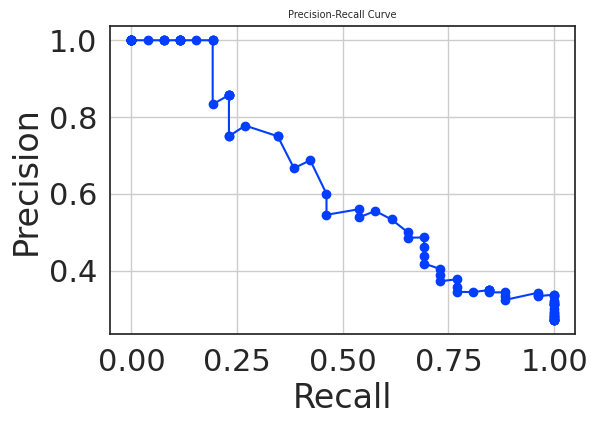

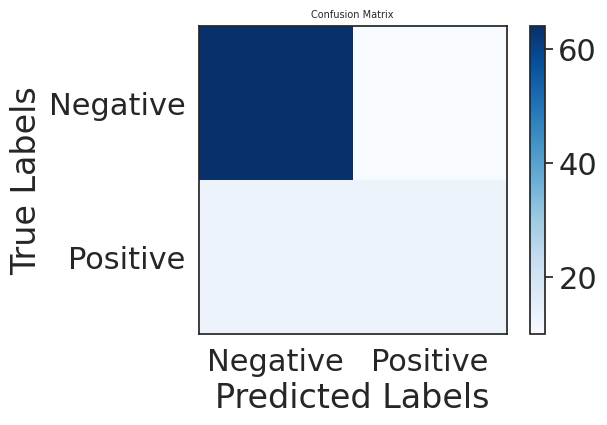

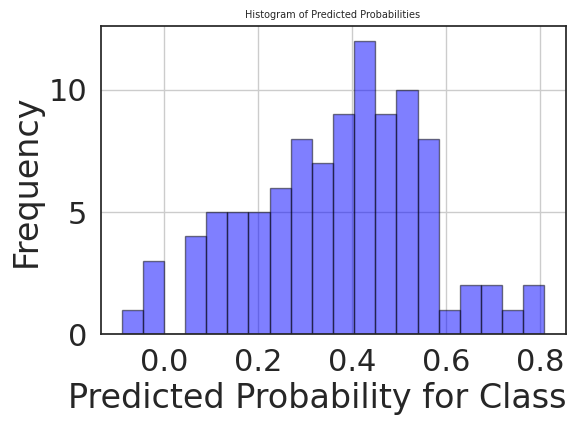

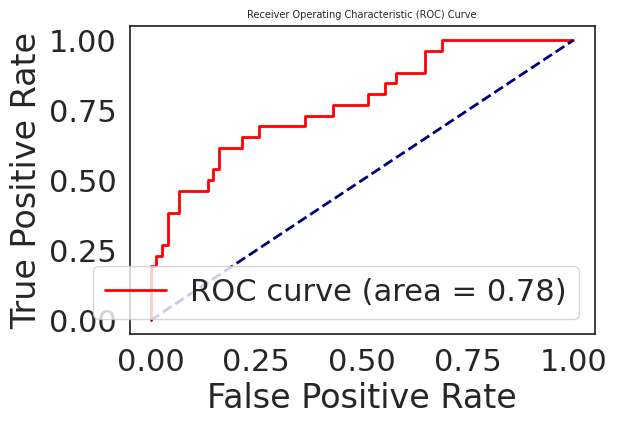

In [215]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate precision-recall curve
def precision_recall_curve(y_true, y_scores):
    thresholds = np.linspace(0, 1, num=100)
    precision_values = []
    recall_values = []

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        TP = np.sum(np.logical_and(y_true == 1, y_pred == 1))
        FP = np.sum(np.logical_and(y_true == 0, y_pred == 1))
        FN = np.sum(np.logical_and(y_true == 1, y_pred == 0))

        if TP + FP == 0:
            precision = 1  # Handle the case of zero precision gracefully
        else:
            precision = TP / (TP + FP)

        if TP + FN == 0:
            recall = 1  # Handle the case of zero recall gracefully
        else:
            recall = TP / (TP + FN)

        precision_values.append(precision)
        recall_values.append(recall)

    return precision_values, recall_values

y_scores = Y_pred1[:, 1]  # Use the scores for class 1
precision_values, recall_values = precision_recall_curve(Y_true_binary1, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(6,4))
plt.plot(recall_values, precision_values, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Calculate the confusion matrix manually (as in your existing code)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Plot histogram of predicted probabilities
plt.figure(figsize=(6,4))
plt.hist(y_scores, bins=20, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

fpr, tpr, _ = roc_curve(np.argmax(Y_test1, axis=1), Y_pred1[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()


Logistic Regression

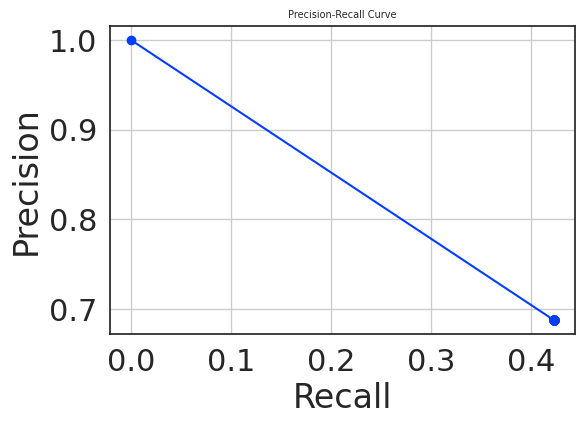

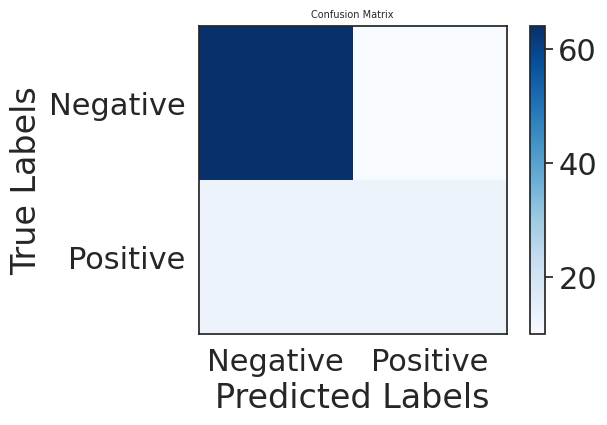

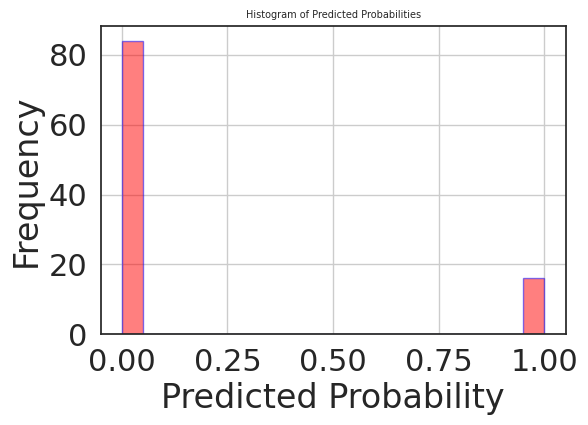

In [216]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate precision-recall curve
def precision_recall_curve(y_true, y_scores):
    thresholds = np.linspace(0, 1, num=100)
    precision_values = []
    recall_values = []

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        TP = np.sum(np.logical_and(y_true == 1, y_pred == 1))
        FP = np.sum(np.logical_and(y_true == 0, y_pred == 1))
        FN = np.sum(np.logical_and(y_true == 1, y_pred == 0))

        if TP + FP == 0:
            precision = 1
        else:
            precision = TP / (TP + FP)

        if TP + FN == 0:
            recall = 1
        else:
            recall = TP / (TP + FN)

        precision_values.append(precision)
        recall_values.append(recall)

    return precision_values, recall_values

y_scores = clf.predict(X_test).flatten()
precision_values, recall_values = precision_recall_curve(y_test[0], y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall_values, precision_values, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Plot histogram of predicted probabilities
plt.figure(figsize=(6,4))
plt.hist(y_scores, bins=20, alpha=0.5, color='red', edgecolor='blue')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


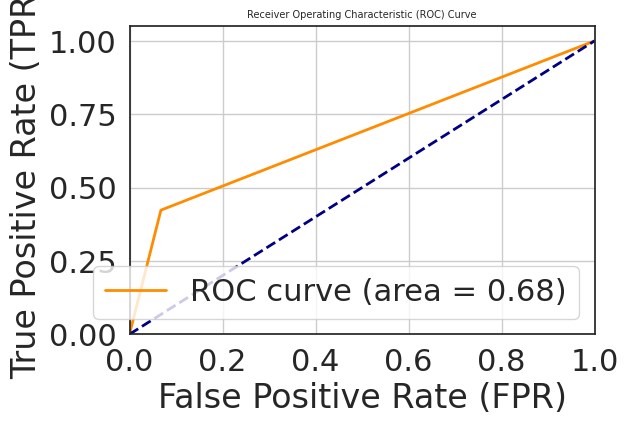

In [217]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
def roc_curve_values(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    return fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve_values(y_test[0], y_scores)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The Receiver Operating Characteristic (ROC) plot is a graphical representation of the performance of a binary classification model at different classification thresholds. Here are some insights you can gather from observing an ROC plot:

1. **Threshold Selection**: ROC curves show the trade-off between the True Positive Rate (TPR or Sensitivity) and the False Positive Rate (FPR or 1-Specificity) at various classification thresholds. You can visually assess the balance between TPR and FPR and choose a threshold that aligns with your specific needs. For example, you may prioritize high TPR or low FPR depending on the application.

2. **Model Discrimination**: The ROC curve provides a measure of how well your model can distinguish between the two classes. A steeper curve indicates better discrimination. An ideal model would have an ROC curve that rises vertically along the left side (high TPR) and then levels off horizontally along the top (low FPR).

3. **Area Under the Curve (AUC)**: The AUC is a single scalar value that quantifies the overall performance of the classifier. It represents the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance. A higher AUC indicates better overall model performance. A model with an AUC of 0.5 is no better than random guessing, while an AUC of 1.0 represents a perfect classifier.

4. **Comparison of Models**: You can compare the ROC curves and AUC values of different models to determine which one performs better. A model with a higher AUC is generally preferred, but it's also essential to consider the specific trade-offs between TPR and FPR based on your application.

5. **Imbalanced Datasets**: ROC curves are helpful when dealing with imbalanced datasets, where one class is much more prevalent than the other. They allow you to assess the model's performance independently of class distribution and help you make decisions based on the chosen threshold.

6. **Threshold Tuning**: You can use the ROC curve to select an appropriate threshold that balances sensitivity and specificity based on your specific business or application requirements. This threshold tuning can help you achieve the desired balance between true positives and false positives.

7. **Model Robustness**: By analyzing how the ROC curve changes under different conditions or datasets, you can assess the robustness of your model. A consistent ROC curve across different datasets indicates that the model generalizes well.

In summary, the ROC plot provides valuable insights into the performance and behavior of a binary classification model across different thresholds. It helps you make informed decisions about model selection, threshold tuning, and assessing the trade-offs between true positives and false positives in your classification task.

least sqaure classification

# **_5. References_**

1.   https://www.kaggle.com/code/ohseokkim/diabetes-three-ensemble-models
2.   List item

